# AN EXPLORATORY DATA ANALYSIS OF THE MENTAL HEALTH DATASET OF STUDENTS IN A CERTAIN COLLEGE

## Importing and Cleaning of Dataset

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
mhealth = pd.read_csv(r"C:\Users\Vincent Oloyede\Desktop\My Portfolio Projects\Mental health\Student Mental health.csv")
mhealth.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
# Rename some long-name columns and drop an unnecessary column

mhealth.rename(columns={"Choose your gender": "Gender",
                        "What is your course?": "Course of Study",
                        "Your current year of Study": "Current Study Year",
                        "What is your CGPA?": "CGPA",
                        "Marital status": "Married?",
                        "Do you have Depression?": "Depression",
                        "Do you have Anxiety?": "Anxiety",
                        "Do you have Panic attack?": "Panic Attack",
                        "Did you seek any specialist for a treatment?": "Sought for treatment"},
                        inplace=True)

mhealth.drop(['Timestamp'], axis=1, inplace=True)

In [4]:
# shape of the dataset
mhealth.shape

(101, 10)

The Dataset has 101 rows and 10 columns

In [5]:
# check for information on each data column

mhealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                101 non-null    object 
 1   Age                   100 non-null    float64
 2   Course of Study       101 non-null    object 
 3   Current Study Year    101 non-null    object 
 4   CGPA                  101 non-null    object 
 5   Married?              101 non-null    object 
 6   Depression            101 non-null    object 
 7   Anxiety               101 non-null    object 
 8   Panic Attack          101 non-null    object 
 9   Sought for treatment  101 non-null    object 
dtypes: float64(1), object(9)
memory usage: 8.0+ KB


The Age column has a null value

In [6]:
# prints the row with the null value

mhealth[mhealth["Age"].isna()]

,Gender,Age,Course of Study,Current Study Year,CGPA,Married?,Depression,Anxiety,Panic Attack,Sought for treatment
43,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


In [7]:
# strip some columns of every whitespace in the data values

mhealth['Course of Study'] = mhealth['Course of Study'].apply(lambda x: x.strip())
mhealth['CGPA'] = mhealth['CGPA'].apply(lambda x: x.strip())

In [8]:
# print number of unique values for each column

for column in mhealth:
    print(column, mhealth[column].nunique())

Gender 2
Age 7
Course of Study 48
Current Study Year 7
CGPA 5
Married? 2
Depression 2
Anxiety 2
Panic Attack 2
Sought for treatment 2


In [9]:
# print unique values of all columns

print("Gender :",mhealth['Gender'].unique())
print("Age :",mhealth['Age'].unique())
print("Course of Study :",mhealth['Course of Study'].unique())
print("Current Study Year :",mhealth['Current Study Year'].unique())
print("CGPA :",mhealth['CGPA'].unique())
print("Married? :",mhealth['Married?'].unique())
print("Depression :",mhealth['Depression'].unique())
print("Anxiety :",mhealth['Anxiety'].unique())
print("Panic Attack :",mhealth['Panic Attack'].unique())
print("Sought for treatment :",mhealth['Sought for treatment'].unique())

Gender : ['Female' 'Male']
Age : [18. 21. 19. 22. 23. 20. 24. nan]
Course of Study : ['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences' 'Biotechnology'
 'Communication' 'Diploma Nursing' 'Pendidikan Islam' 'Radiography'
 'psychology' 'Fiqh fatwa' 'DIPLOMA TESL' 'Koe' 'Fiqh' 'Islamic Education'
 'Nursing']
Current Study Year : ['year 1' 'year 2' 'Year 1' 'year 3' 'year 4' 'Year 2' 'Year 3']
CGPA : ['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']
Married? : ['No' 'Yes']
Depression : ['Yes' 'No']
Anxiety : ['No' 'Yes']
Panic Attack : ['Yes' 'No']
Sought for treatment : ['No' 'Yes']


In [10]:
# replace some values with the correct terms

mhealth['Course of Study'] = mhealth['Course of Study'].replace(["BIT", "IT"], "Information Technology")
mhealth['Course of Study'] = mhealth['Course of Study'].replace(["Laws"], "Law")
mhealth['Course of Study'] = mhealth['Course of Study'].replace(["Pendidikan islam"], "Pendidikan Islam")
mhealth['Course of Study'] = mhealth['Course of Study'].replace(["BCS"], "Computer Science")
mhealth['Course of Study'] = mhealth['Course of Study'].replace(["Irkhs", "KIRKHS", "Kirkhs", "Human Sciences"], "Islamic Revealed Knowledge and Human Sciences")
mhealth['Course of Study'] = mhealth['Course of Study'].replace(["KENMS", "Econs", "ENM"], "Economics and Management Sciences")
mhealth['Course of Study'] = mhealth['Course of Study'].replace(["KOE", "koe", "Koe", "engin", "Engine"], "Engineering")
mhealth['Course of Study'] = mhealth['Course of Study'].replace(["BENL", "Benl"], "English Language and Literature")
mhealth['Course of Study'] = mhealth['Course of Study'].replace(["CTS"], "Computational and Theoretical Studies")
mhealth['Course of Study'] = mhealth['Course of Study'].replace(["Kop"], "Pharmacy")
mhealth['Course of Study'] = mhealth['Course of Study'].replace(["Diploma Nursing"], "Nursing")
mhealth['Course of Study'] = mhealth['Course of Study'].replace(["psychology"], "Psychology")
mhealth['Course of Study'] = mhealth['Course of Study'].replace(["Fiqh fatwa"], "Fiqh")
mhealth['Course of Study'] = mhealth['Course of Study'].replace(["Islamic education"], "Islamic Education")
mhealth['Current Study Year'] = mhealth['Current Study Year'].replace(['year 1'], 'Year 1')
mhealth['Current Study Year'] = mhealth['Current Study Year'].replace(['year 2'], 'Year 2')
mhealth['Current Study Year'] = mhealth['Current Study Year'].replace(['year 3'], 'Year 3')
mhealth['Current Study Year'] = mhealth['Current Study Year'].replace(['year 4'], 'Year 4')

In [12]:
# count of values in gender column

mhealth['Gender'].value_counts()

Female    75
Male      26
Name: Gender, dtype: int64

In [13]:
# null value was dropped

mhealth.dropna(inplace=True)
mhealth.shape

(100, 10)

# Exploratory Data Analysis

In [14]:
# Weighted mean

gcount = mhealth.groupby("Gender", as_index=False).Age.mean()
gcount

,Gender,Age
0,Female,20.533333
1,Male,20.520000


In [15]:
# percentage of students with none/one/two/all of the mental health indicators

#  count the number of 'No' values across all three columns for each row
no_counts = mhealth[['Depression', 'Anxiety', 'Panic Attack']].apply(lambda row: row.str.count('No').sum(), axis=1)

total_students = len(mhealth)

# calculate the percentage of students who do not show any of the mental health indicators
studnone = len(no_counts[no_counts == 3])
percent_studnone = (studnone / total_students) * 100
print("%.2f percent of the students show none of the mental health indicators." %(percent_studnone))

# calculate the percentage of students who show just one of the mental health indicators
studone = len(no_counts[no_counts == 2])
percent_studone = (studone / total_students) * 100
print("%.2f percent of the students show just one of the mental health indicators." %(percent_studone))

# calculate the percentage of students who show two of the mental health indicators
studtwo = len(no_counts[no_counts == 1])
percent_studtwo = (studtwo / total_students) * 100
print("%.2f percent of the students show two of the mental health indicators." %(percent_studtwo))

# calculate the percentage of students who show all three of the mental health indicators
studall = len(no_counts[no_counts == 0])
percent_studall = (studall / total_students) * 100
print("%.2f percent of the students show all of the mental health indicators." %(percent_studall))


36.00 percent of the students show none of the mental health indicators.
36.00 percent of the students show just one of the mental health indicators.
18.00 percent of the students show two of the mental health indicators.
10.00 percent of the students show all of the mental health indicators.


This gives that 36% of the total student population shows neither depression, anxiety nor panic attack. 36% also showed just one of these indicators, 18% show two and just 10% show all of these mental health indicators

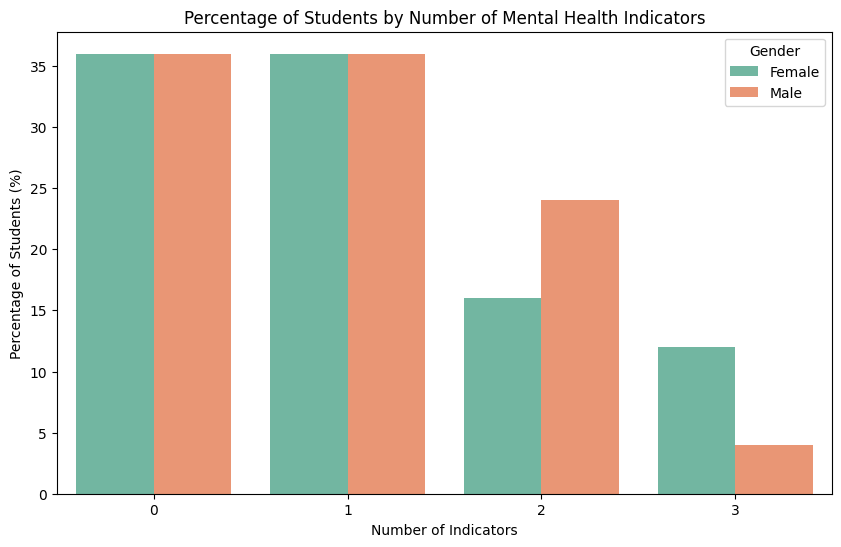

In [16]:
# percentage of students with none/one/two/all of the mental health indicators

#  count the number of 'Yes' values across all three columns for each row
mhealth['Total Indicators'] = mhealth[['Depression', 'Anxiety', 'Panic Attack']].apply(lambda row: row.eq('Yes').sum(), axis=1) #eq compares each element in the series to the string Yes and returns a boolean value

# create a dataframe to store the counts
result = mhealth.groupby(['Gender', 'Total Indicators']).size().reset_index(name='Count')

# calculate the total number of students by gender
total_students = mhealth['Gender'].value_counts().reset_index()
total_students.columns = ['Gender', 'Total']

#merge the counts with total_students to calculate the percentage
result = result.merge(total_students, on='Gender')
result['Percentage'] = (result['Count'] / result['Total']) * 100

# Plot the data
plt.figure(figsize=(10,6))
sns.barplot(x='Total Indicators', y='Percentage', hue='Gender', data=result, palette='Set2')
plt.xlabel('Number of Indicators')
plt.ylabel("Percentage of Students (%)")
plt.title("Percentage of Students by Number of Mental Health Indicators")
plt.legend(title='Gender', loc='upper right')
plt.show()

The plot shows that more male students show just 2 of the indicators and more female students show all of these indicators

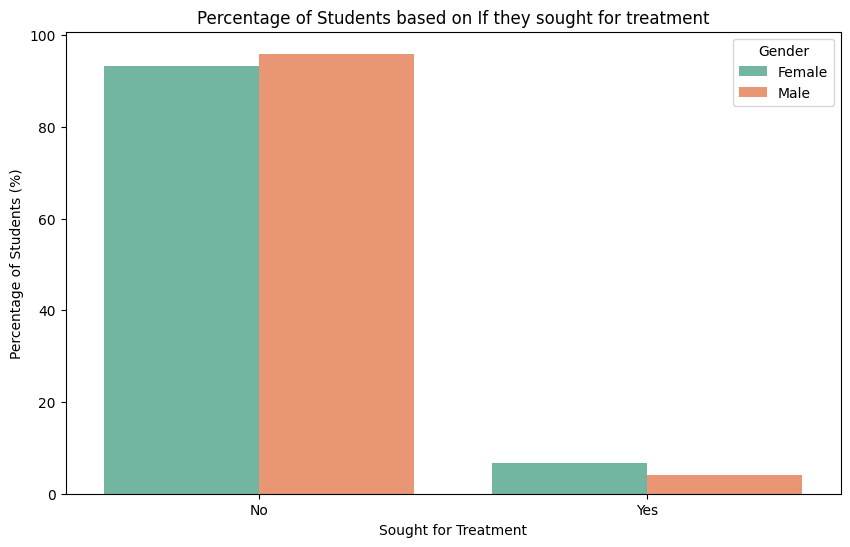

In [20]:
# percentage of students that went for treatment
treatmh = mhealth.groupby(['Gender', 'Sought for treatment']).size().reset_index(name='Count')

#merge the student counts with total_students to calculate the percentage
treatmh = treatmh.merge(total_students, on='Gender')
treatmh['Percentage'] = (treatmh['Count'] / treatmh['Total']) * 100

# Plot the data
plt.figure(figsize=(10,6))
sns.barplot(x='Sought for treatment', y='Percentage', hue='Gender', data=treatmh, palette='Set2')
plt.xlabel('Sought for Treatment')
plt.ylabel("Percentage of Students (%)")
plt.title("Percentage of Students based on If they sought for treatment")
plt.legend(title='Gender', loc='upper right')
plt.show()

More female students tend to go for treatment compared to male students, albeit a small percentage difference

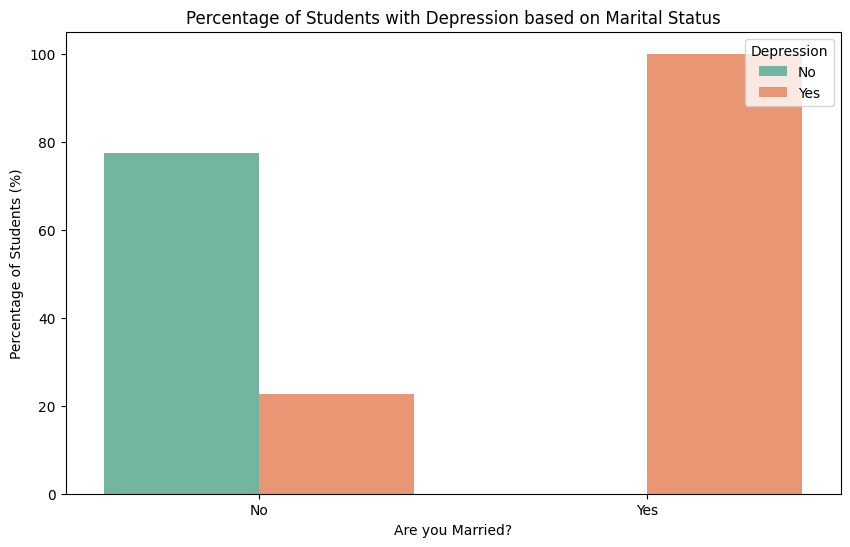

In [42]:
# percentage of students that have depression based on marital status
married_dep = mhealth.groupby(['Married?', 'Depression']).size().reset_index(name='Count')

# calculate total number of students based on marital status
total_students = mhealth['Married?'].value_counts().reset_index()
total_students.columns = ['Married?', 'Total']
#merge the student counts with total_students to calculate the percentage
married_dep = married_dep.merge(total_students, on='Married?')
married_dep['Percentage'] = (married_dep['Count'] / married_dep['Total']) * 100

# Plot the data
plt.figure(figsize=(10,6))
sns.barplot(x='Married?', y='Percentage', hue='Depression', data=married_dep, errorbar=None, palette='Set2')
plt.xlabel('Are you Married?')
plt.ylabel("Percentage of Students (%)")
plt.title("Percentage of Students with Depression based on Marital Status")
plt.legend(title='Depression', loc='upper right')
plt.show()

All married students show depression

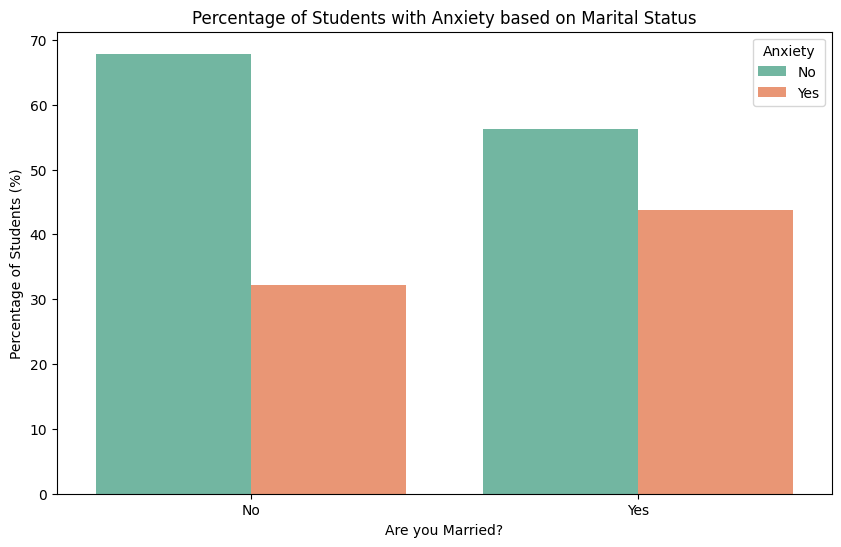

In [43]:
# percentage of students that have anxiety based on marital status
married_anx = mhealth.groupby(['Married?', 'Anxiety']).size().reset_index(name='Count')

# calculate total number of students based on marital status
total_students = mhealth['Married?'].value_counts().reset_index()
total_students.columns = ['Married?', 'Total']

#merge the student counts with total_students to calculate the percentage
married_anx = married_anx.merge(total_students, on='Married?')
married_anx['Percentage'] = (married_anx['Count'] / married_anx['Total']) * 100

# Plot the data
plt.figure(figsize=(10,6))
sns.barplot(x='Married?', y='Percentage', hue='Anxiety', data=married_anx, errorbar=None, palette='Set2')
plt.xlabel('Are you Married?')
plt.ylabel("Percentage of Students (%)")
plt.title("Percentage of Students with Anxiety based on Marital Status")
plt.legend(title='Anxiety', loc='upper right')
plt.show()

A higher percentage of married students exhibit anxiety as compared to those who are not married.

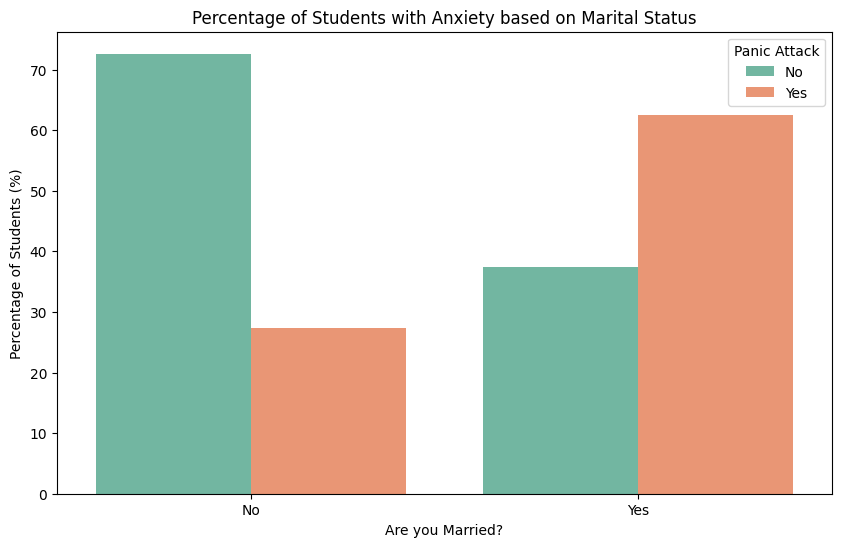

In [44]:
# percentage of students that have anxiety based on marital status
married_pan = mhealth.groupby(['Married?', 'Panic Attack']).size().reset_index(name='Count')

# calculate total number of students based on marital status
total_students = mhealth['Married?'].value_counts().reset_index()
total_students.columns = ['Married?', 'Total']

#merge the student counts with total_students to calculate the percentage
married_pan = married_pan.merge(total_students, on='Married?')
married_pan['Percentage'] = (married_pan['Count'] / married_pan['Total']) * 100

# Plot the data
plt.figure(figsize=(10,6))
sns.barplot(x='Married?', y='Percentage', hue='Panic Attack', data=married_pan, errorbar=None, palette='Set2')
plt.xlabel('Are you Married?')
plt.ylabel("Percentage of Students (%)")
plt.title("Percentage of Students with Panic Attack based on Marital Status")
plt.legend(title='Panic Attack', loc='upper right')
plt.show()

A higher percent of married students also experience panic attack as compared to students that are not married

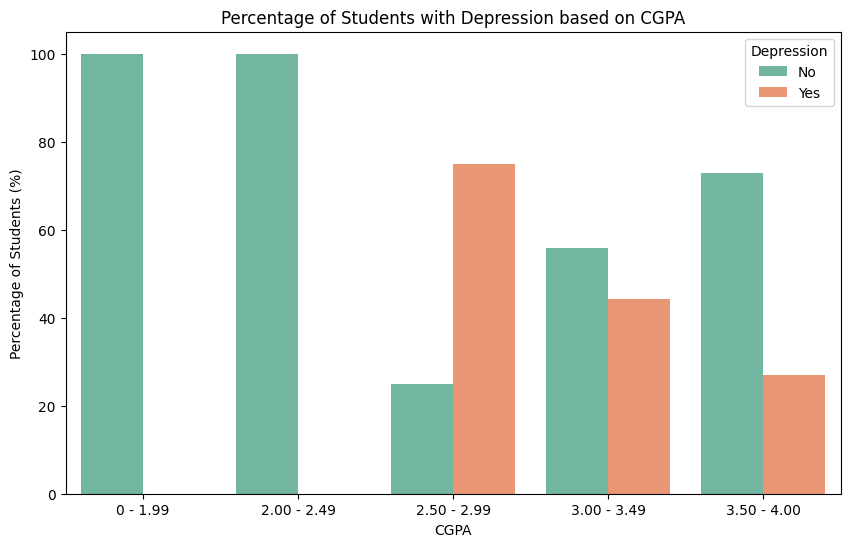

In [54]:
# percentage of students in each CGPA range with depression

# group and count number of students in each cgpa range
cgpa_dep = mhealth.groupby(['CGPA', 'Depression']).size().reset_index(name='Count')

# calculate total number of students based on marital CGPA
total_students_cgpa = mhealth['CGPA'].value_counts().reset_index()
total_students_cgpa.columns = ['CGPA', 'Total']

#merge the student counts with total_students to calculate the percentage
cgpa_dep = cgpa_dep.merge(total_students_cgpa, on='CGPA')
cgpa_dep['Percentage'] = (cgpa_dep['Count'] / cgpa_dep['Total']) * 100

# Plot the data
plt.figure(figsize=(10,6))
sns.barplot(x='CGPA', y='Percentage', hue='Depression', data=cgpa_dep, errorbar=None, palette='Set2')
plt.xlabel('CGPA')
plt.ylabel("Percentage of Students (%)")
plt.title("Percentage of Students with Depression based on CGPA")
plt.legend(title='Depression', loc='upper right')
plt.show()

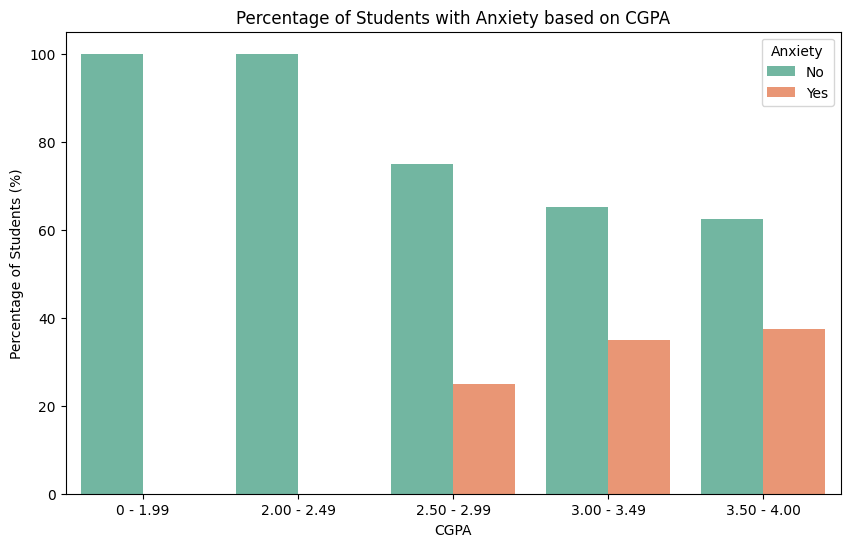

In [55]:
# percentage of students in each CGPA range with anxiety

# group and count number of students in each cgpa range
cgpa_anx = mhealth.groupby(['CGPA', 'Anxiety']).size().reset_index(name='Count')

# calculate total number of students based on marital status
total_students_cgpa = mhealth['CGPA'].value_counts().reset_index()
total_students_cgpa.columns = ['CGPA', 'Total']

#merge the student counts with total_students to calculate the percentage
cgpa_anx = cgpa_anx.merge(total_students_cgpa, on='CGPA')
cgpa_anx['Percentage'] = (cgpa_anx['Count'] / cgpa_anx['Total']) * 100

# Plot the data
plt.figure(figsize=(10,6))
sns.barplot(x='CGPA', y='Percentage', hue='Anxiety', data=cgpa_anx, errorbar=None, palette='Set2')
plt.xlabel('CGPA')
plt.ylabel("Percentage of Students (%)")
plt.title("Percentage of Students with Anxiety based on CGPA")
plt.legend(title='Anxiety', loc='upper right')
plt.show()

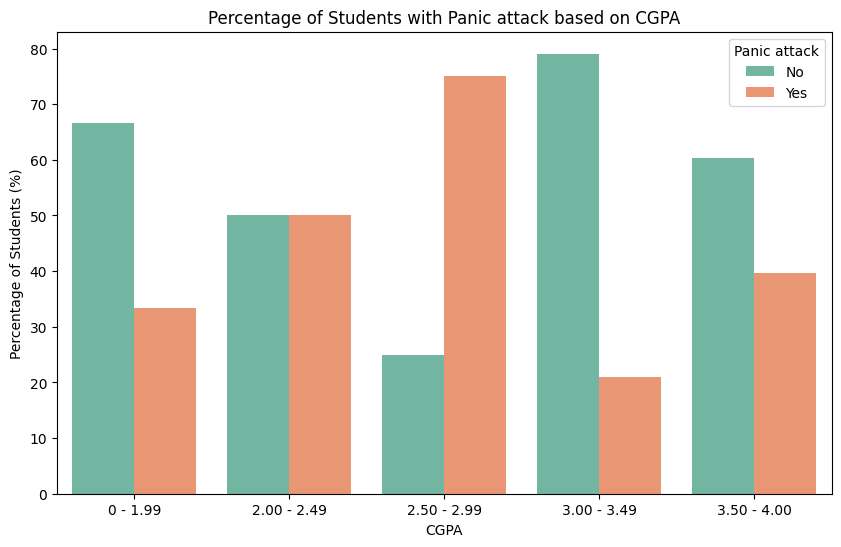

In [57]:
# percentage of students in each CGPA range with panic attack

# group and count number of students in each cgpa range
cgpa_pan = mhealth.groupby(['CGPA', 'Panic Attack']).size().reset_index(name='Count')

# calculate total number of students based on marital status
total_students_cgpa = mhealth['CGPA'].value_counts().reset_index()
total_students_cgpa.columns = ['CGPA', 'Total']

#merge the student counts with total_students to calculate the percentage
cgpa_pan = cgpa_pan.merge(total_students_cgpa, on='CGPA')
cgpa_pan['Percentage'] = (cgpa_pan['Count'] / cgpa_pan['Total']) * 100

# Plot the data
plt.figure(figsize=(10,6))
sns.barplot(x='CGPA', y='Percentage', hue='Panic Attack', data=cgpa_pan, errorbar=None, palette='Set2')
plt.xlabel('CGPA')
plt.ylabel("Percentage of Students (%)")
plt.title("Percentage of Students with Panic attack based on CGPA")
plt.legend(title='Panic attack', loc='upper right')
plt.show()

CGPA doesn't seem to affect the students' mental health, although there is a concern with those with CGPA 2.50 - 2.99 

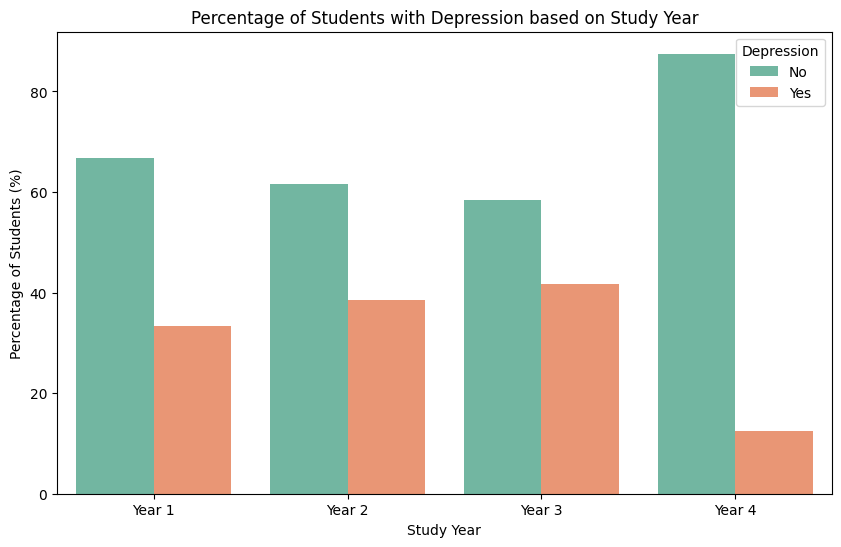

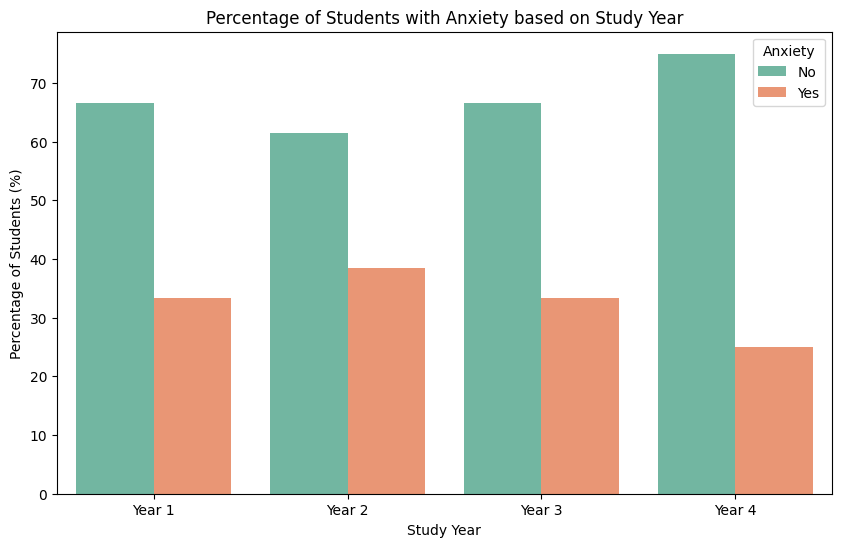

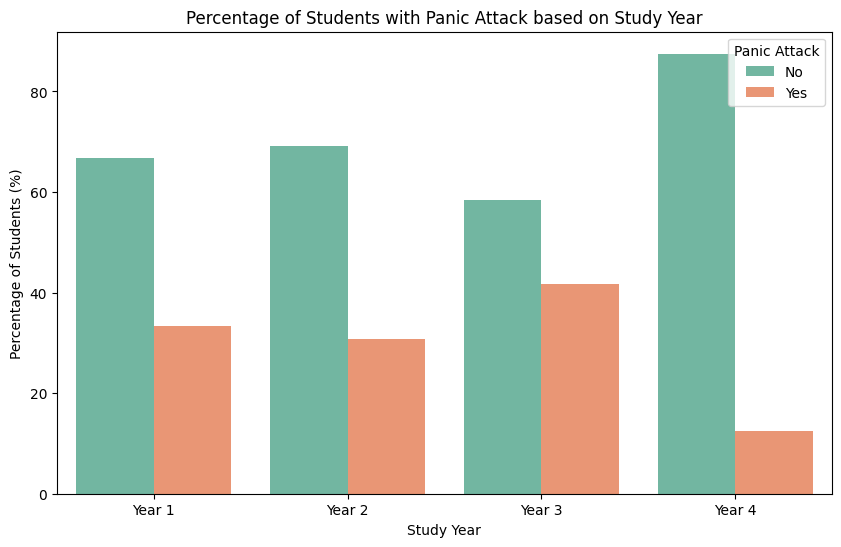

In [59]:
# percentage of students in each study year with each of the mental health indicators

# group and count number of students for each indicator
year_dep = mhealth.groupby(['Current Study Year', 'Depression']).size().reset_index(name='Count')
year_anx = mhealth.groupby(['Current Study Year', 'Anxiety']).size().reset_index(name='Count')
year_pan = mhealth.groupby(['Current Study Year', 'Panic Attack']).size().reset_index(name='Count')

# calculate total number of students based on their current year of study
total_students_year = mhealth['Current Study Year'].value_counts().reset_index()
total_students_year.columns = ['Current Study Year', 'Total']

# merge the student counts with total_students to calculate the percentage
year_dep = year_dep.merge(total_students_year, on='Current Study Year')
year_dep['Percentage'] = (year_dep['Count'] / year_dep['Total']) * 100

year_anx = year_anx.merge(total_students_year, on='Current Study Year')
year_anx['Percentage'] = (year_anx['Count'] / year_anx['Total']) * 100

year_pan = year_pan.merge(total_students_year, on='Current Study Year')
year_pan['Percentage'] = (year_pan['Count'] / year_pan['Total']) * 100

# Plot the data
plt.figure(figsize=(10,6))
sns.barplot(x='Current Study Year', y='Percentage', hue='Depression', data=year_dep, errorbar=None, palette='Set2')
plt.xlabel('Study Year')
plt.ylabel("Percentage of Students (%)")
plt.title("Percentage of Students with Depression based on Study Year")
plt.legend(title='Depression', loc='upper right')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Current Study Year', y='Percentage', hue='Anxiety', data=year_anx, errorbar=None, palette='Set2')
plt.xlabel('Study Year')
plt.ylabel("Percentage of Students (%)")
plt.title("Percentage of Students with Anxiety based on Study Year")
plt.legend(title='Anxiety', loc='upper right')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Current Study Year', y='Percentage', hue='Panic Attack', data=year_pan, errorbar=None, palette='Set2')
plt.xlabel('Study Year')
plt.ylabel("Percentage of Students (%)")
plt.title("Percentage of Students with Panic Attack based on Study Year")
plt.legend(title='Panic Attack', loc='upper right')
plt.show()

Most students in Year 4 do not exhibit these indicators

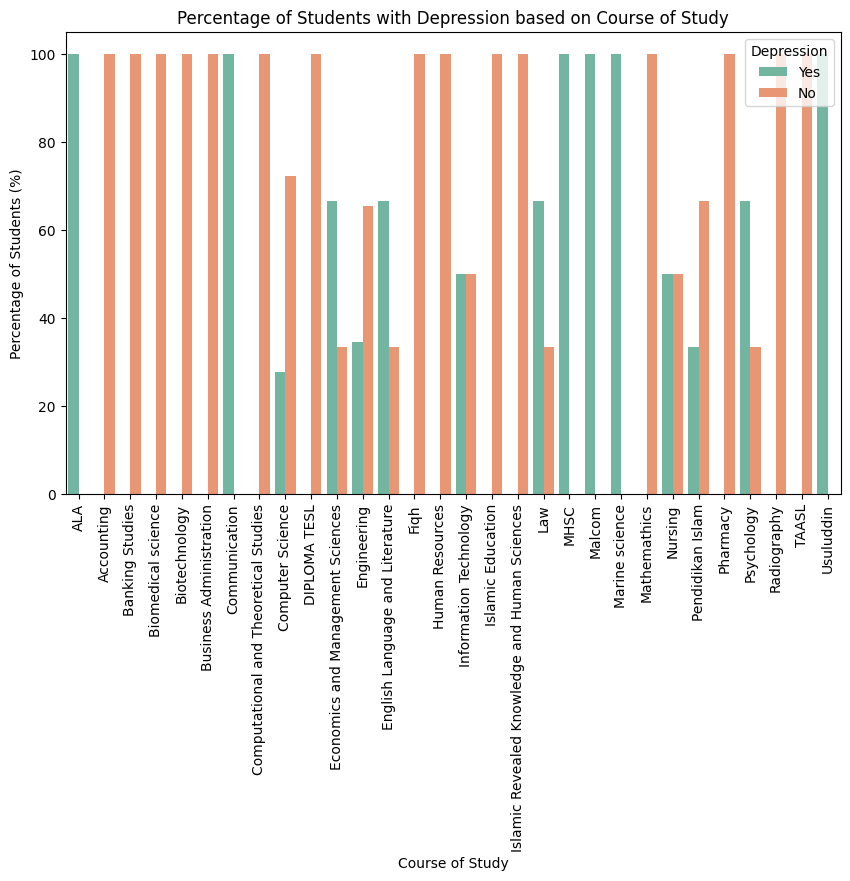

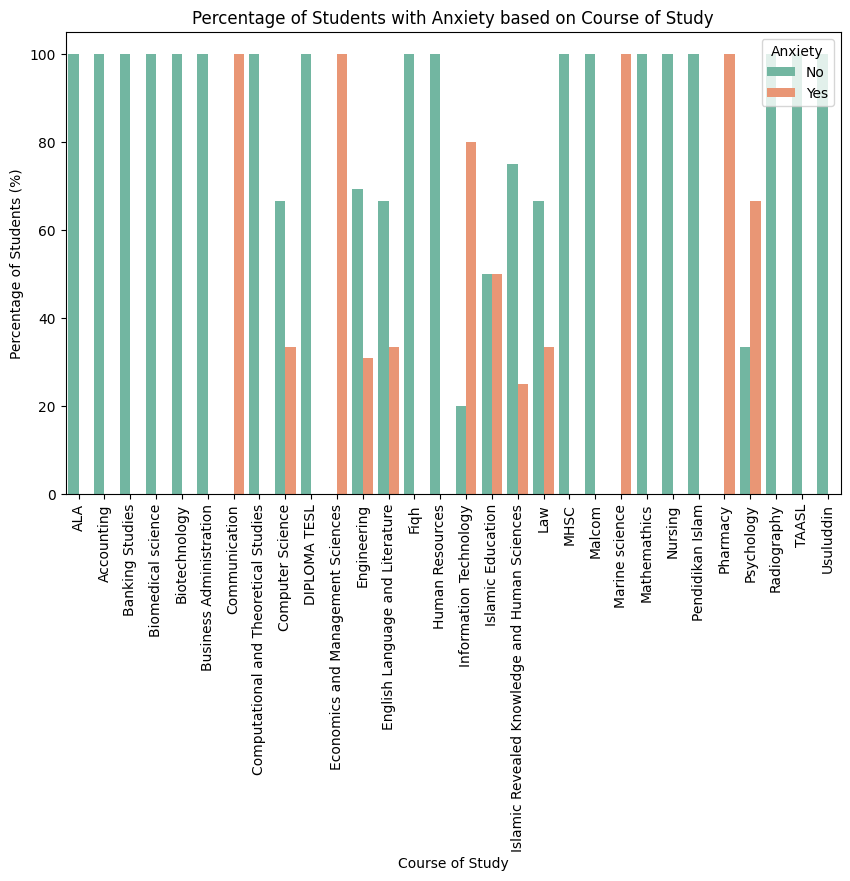

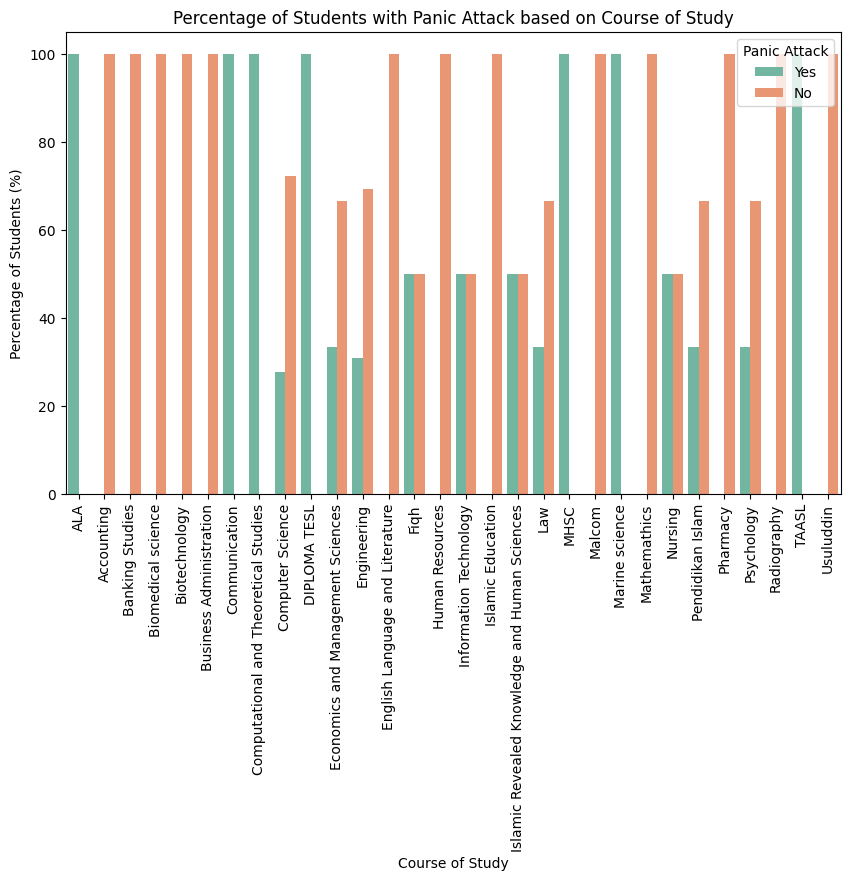

In [69]:
# percentage of students in each course of study with each of the mental health indicators

# group and count number of students for each indicator
course_dep = mhealth.groupby(['Course of Study', 'Depression']).size().reset_index(name='Count')
course_anx = mhealth.groupby(['Course of Study', 'Anxiety']).size().reset_index(name='Count')
course_pan = mhealth.groupby(['Course of Study', 'Panic Attack']).size().reset_index(name='Count')

# calculate total number of students based on their course of study
total_students_course = mhealth['Course of Study'].value_counts().reset_index()
total_students_course.columns = ['Course of Study', 'Total']

# merge the student counts with total_students to calculate the percentage
course_dep = course_dep.merge(total_students_course, on='Course of Study')
course_dep['Percentage'] = (course_dep['Count'] / course_dep['Total']) * 100

course_anx = course_anx.merge(total_students_course, on='Course of Study')
course_anx['Percentage'] = (course_anx['Count'] / course_anx['Total']) * 100

course_pan = course_pan.merge(total_students_course, on='Course of Study')
course_pan['Percentage'] = (course_pan['Count'] / course_pan['Total']) * 100

# Plot the data
plt.figure(figsize=(10,6))
sns.barplot(x='Course of Study', y='Percentage', hue='Depression', data=course_dep, errorbar=None, palette='Set2')
plt.xlabel('Course of Study')
plt.ylabel("Percentage of Students (%)")
plt.title("Percentage of Students with Depression based on Course of Study")
plt.legend(title='Depression', loc='upper right')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Course of Study', y='Percentage', hue='Anxiety', data=course_anx, errorbar=None, palette='Set2')
plt.xlabel('Course of Study')
plt.ylabel("Percentage of Students (%)")
plt.title("Percentage of Students with Anxiety based on Course of Study")
plt.legend(title='Anxiety', loc='upper right')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Course of Study', y='Percentage', hue='Panic Attack', data=course_pan, errorbar=None, palette='Set2')
plt.xlabel('Course of Study')
plt.ylabel("Percentage of Students (%)")
plt.title("Percentage of Students with Panic Attack based on Course of Study")
plt.legend(title='Panic Attack', loc='upper right')
plt.xticks(rotation=90)
plt.show()

Some courses are tougher that others and can cause students to be depressed or anxious or prone to panic attacks

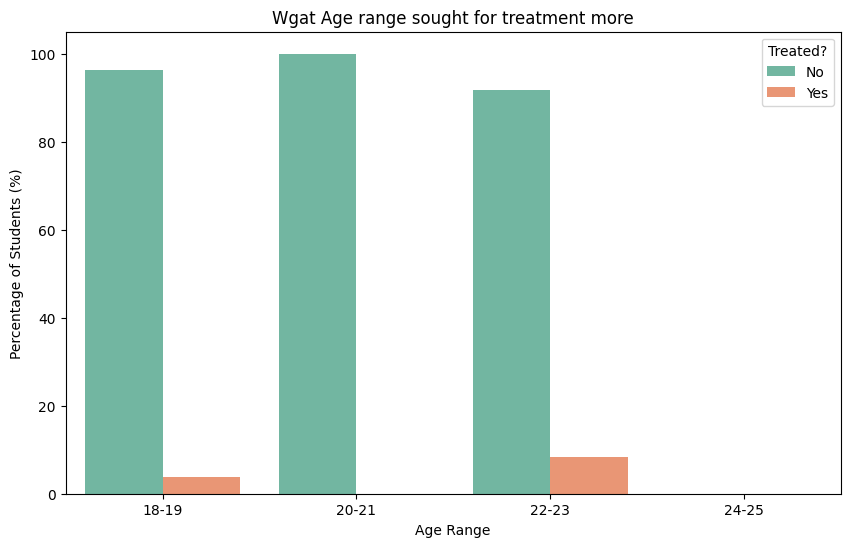

In [78]:
# what age group sought for treatment more

# Define age bins
min_age = mhealth['Age'].min()
max_age = mhealth['Age'].max() + 1.0
age_bin=[]
for i in range(19,28,2):
    age_bin.append(i)

# Define labels for age bins
age_labels = ['18-19', '20-21', '22-23', '24-25']

# create a new column for age ranges
mhealth['Age Range'] = pd.cut(mhealth['Age'], bins=age_bin, labels=age_labels, right=False)

# group and count number of students in each age group
group = mhealth.groupby(['Age Range', 'Sought for treatment']).size().reset_index(name='Count')

# calculate total number of students based on their age range
total_students_age = mhealth['Age Range'].value_counts().reset_index()
total_students_age.columns = ['Age Range', 'Total']

# merge the student counts with total_students to calculate the percentage
group = group.merge(total_students_age, on='Age Range')
group['Percentage'] = (group['Count'] / group['Total']) * 100

# plot figure
plt.figure(figsize=(10,6))
sns.barplot(x='Age Range', y='Percentage', hue='Sought for treatment', data=group, errorbar=None, palette='Set2')
plt.xlabel('Age Range')
plt.ylabel("Percentage of Students (%)")
plt.title("Wgat Age range sought for treatment more")
plt.legend(title='Treated?', loc='upper right')
plt.show()

People aged 22 - 23 tend to seek for treatment more.